In [ ]:
import spacy
from datasets import load_dataset
from collections import Counter
import itertools
from tqdm import tqdm

# Parameters
num_data = 1000  # Adjust this number as needed

# Load the English model in spaCy
nlp = spacy.load("en_core_web_sm")

# Load the dataset in streaming mode
dataset = load_dataset("HuggingFaceFW/fineweb", split='train', streaming=True)

# Initialize counters and variables
pii_counts = Counter()
documents_with_pii = 0
total_documents = num_data
total_tokens = 0
pii_tokens = 0
unique_pii = set()
pii_values = Counter()
pii_counts_per_doc = []

# Process the data with tqdm progress bar
for sample in tqdm(itertools.islice(dataset, num_data), total=num_data, desc="Processing Documents"):
    text = sample['text']
    has_pii = False
    pii_count_in_doc = 0

    # Update total tokens
    total_tokens += len(text.split())

    # spaCy NER for PII detection
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in [
            'PERSON', 'NORP', 'FAC', 'ORG', 'GPE', 'LOC',
            'PRODUCT', 'EVENT', 'WORK_OF_ART', 'LAW', 'LANGUAGE',
            'DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 'ORDINAL', 'CARDINAL',
            'EMAIL', 'PHONE_NUMBER', 'URL'
        ]:
            pii_counts[ent.label_] += 1
            has_pii = True
            # Update PII tokens
            pii_tokens += len(ent.text.split())
            # Add to unique PII
            unique_pii.add(ent.text)
            # Update PII values for top instances
            pii_values[ent.text] += 1
            # Increment PII count in this document
            pii_count_in_doc += 1

    pii_counts_per_doc.append(pii_count_in_doc)

    if has_pii:
        documents_with_pii += 1

# After processing, compute metrics

# Total PII instances
total_pii_instances = sum(pii_counts.values())

# Percentage of documents containing PII
percentage_with_pii = (documents_with_pii / total_documents) * 100

# PII Density
pii_density = (pii_tokens / total_tokens) * 100

# Average PII instances per document
pii_per_document = total_pii_instances / total_documents

# Prepare data for visualization
metrics = {
    'Total PII Instances': total_pii_instances,
    'Documents with PII (%)': percentage_with_pii,
    'PII Density (%)': pii_density,
    'Unique PII Instances': len(unique_pii),
    'Average PII per Document': pii_per_document,
    'PII Counts by Type': pii_counts,
    'Top PII Instances': pii_values.most_common(10),
    'PII Counts per Document': pii_counts_per_doc,
}


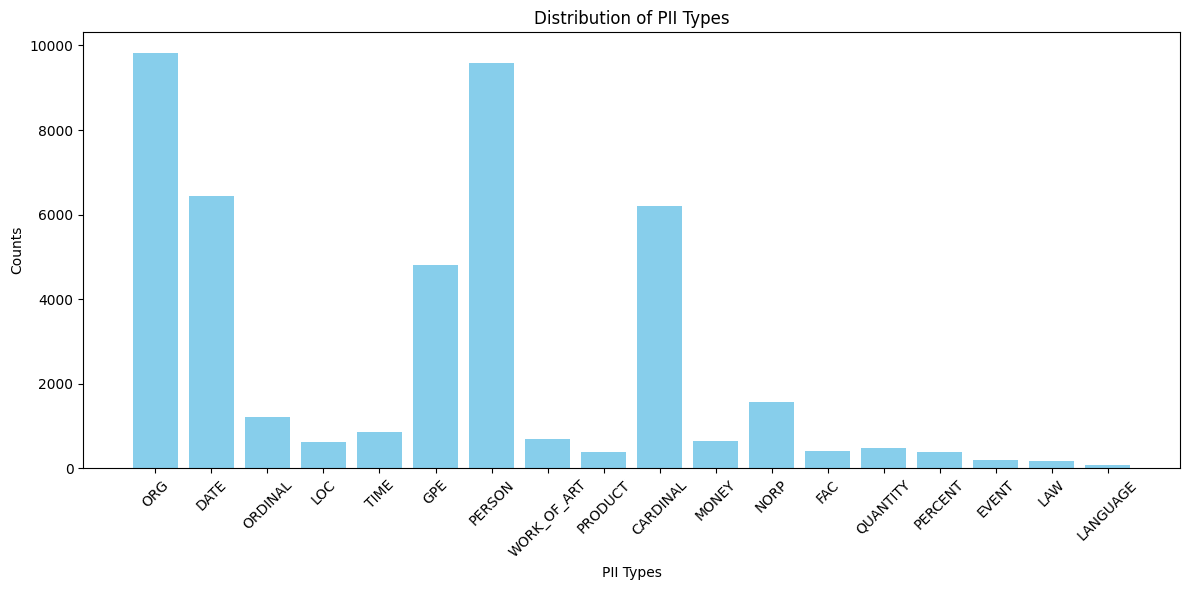

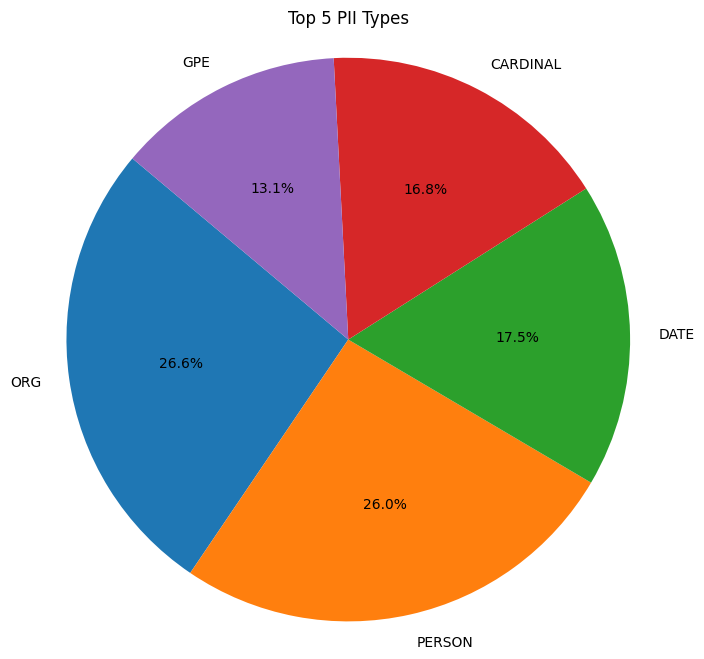

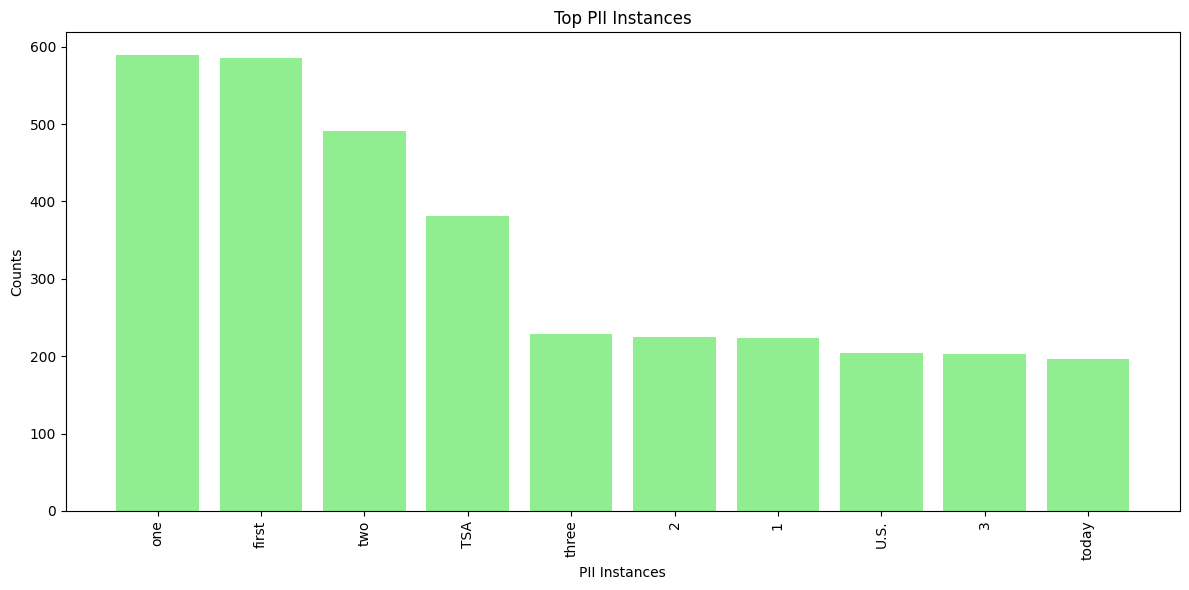

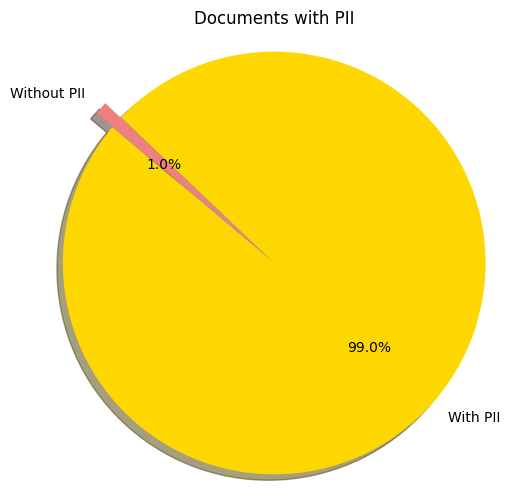

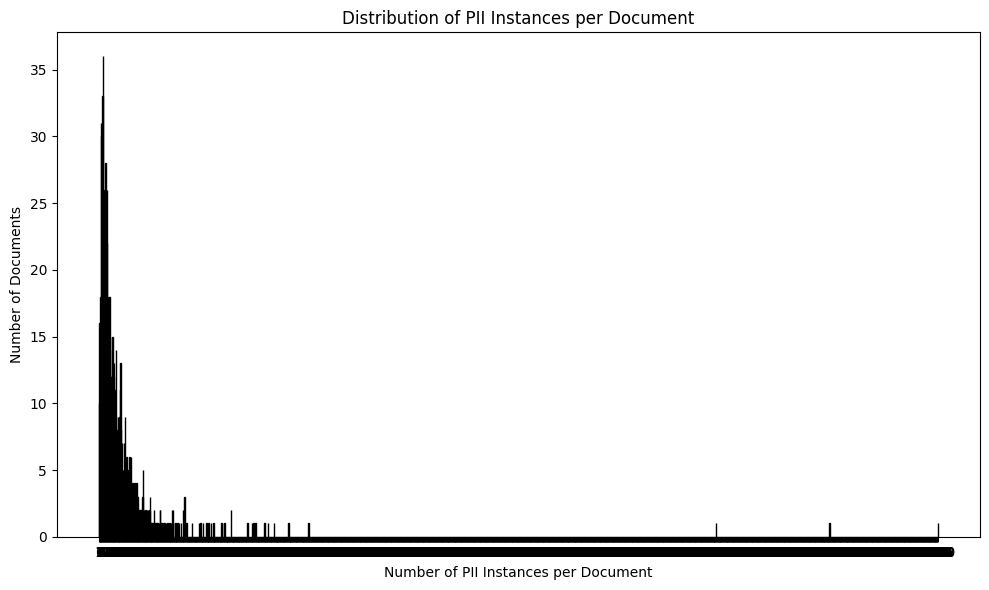

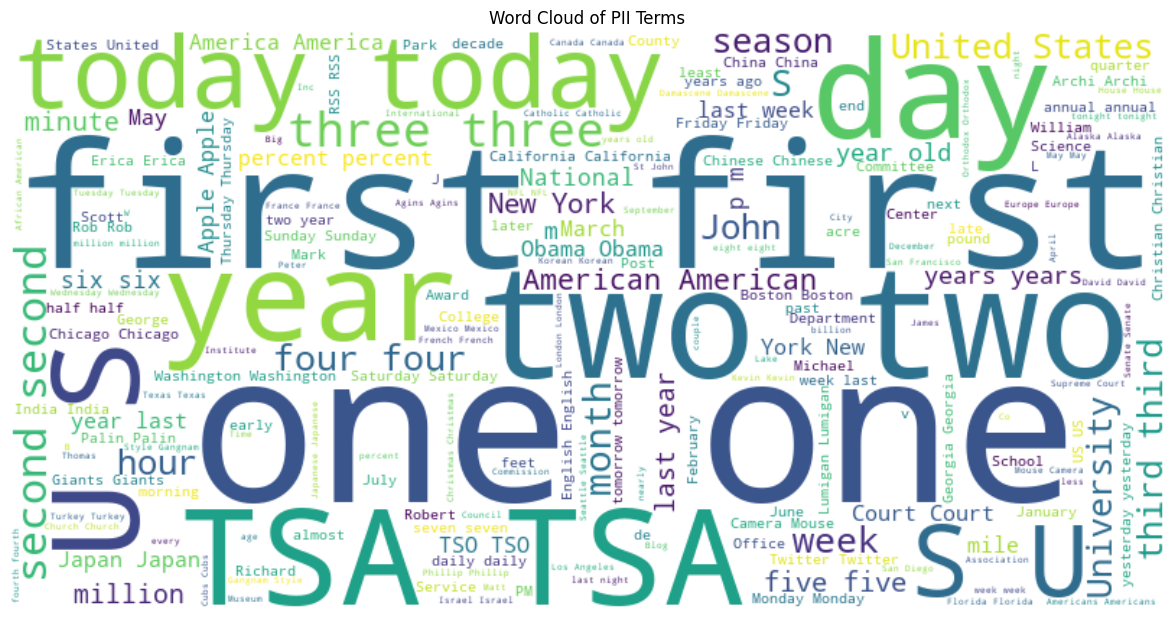


--- Specific Examples of PII Terms ---
Showing 5 examples of PII terms detected:
one (Occurrences: 589)
first (Occurrences: 585)
two (Occurrences: 491)
TSA (Occurrences: 381)
three (Occurrences: 229)


In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# --- Visualization ---

# 1. Bar Chart of PII Types
plt.figure(figsize=(12, 6))
pii_types = list(metrics['PII Counts by Type'].keys())
counts = list(metrics['PII Counts by Type'].values())
plt.bar(pii_types, counts, color='skyblue')
plt.xlabel('PII Types')
plt.ylabel('Counts')
plt.title('Distribution of PII Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Pie Chart of PII Types (Top 5)
top_pii_types = metrics['PII Counts by Type'].most_common(5)
labels, sizes = zip(*top_pii_types)
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 PII Types')
plt.axis('equal')
plt.show()

# 3. Bar Chart of Top PII Instances
top_pii_instances = metrics['Top PII Instances']
if top_pii_instances:
    labels, counts = zip(*top_pii_instances)
    plt.figure(figsize=(12, 6))
    plt.bar(labels, counts, color='lightgreen')
    plt.xlabel('PII Instances')
    plt.ylabel('Counts')
    plt.title('Top PII Instances')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No PII instances to display.")

# 4. Pie Chart of Documents with PII vs. Without PII
labels = ['With PII', 'Without PII']
sizes = [metrics['Documents with PII (%)'], 100 - metrics['Documents with PII (%)']]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Documents with PII')
plt.axis('equal')
plt.show()

# 5. Histogram of PII Instances per Document
plt.figure(figsize=(10, 6))
plt.hist(metrics['PII Counts per Document'], bins=range(max(metrics['PII Counts per Document'])+2), color='purple', edgecolor='black', align='left')
plt.xlabel('Number of PII Instances per Document')
plt.ylabel('Number of Documents')
plt.title('Distribution of PII Instances per Document')
plt.xticks(range(max(metrics['PII Counts per Document'])+1))
plt.tight_layout()
plt.show()

# 6. Word Cloud of PII Terms
pii_terms_text = ' '.join(pii_values.elements())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pii_terms_text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of PII Terms')
plt.show()

# 7. Specific Examples of PII Terms
print("\n--- Specific Examples of PII Terms ---")
examples_to_show = 5
print(f"Showing {examples_to_show} examples of PII terms detected:")
for idx, (pii_term, count) in enumerate(metrics['Top PII Instances']):
    print(f"{pii_term} (Occurrences: {count})")
    if idx + 1 >= examples_to_show:
        break


In [ ]:
!pip install wordcloud

In [ ]:
!pip install spacy
!pip install datasets
!python -m spacy download en_core_web_sm

In [ ]:
!pip install matplotlib

In [ ]:
!pip install tqdm